In [ ]:
#reads dataset (TSLA)
import pandas as pd

data = pd.read_csv('TSLA.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3243,2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600
3244,2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300
3245,2023-05-19,177.169998,181.949997,176.309998,180.139999,180.139999,136024200
3246,2023-05-22,180.699997,189.320007,180.110001,188.869995,188.869995,132001400


In [ ]:
#unnecessary data is discarded
data = data[['Date' , 'Close']]

data

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3243,2023-05-17,173.860001
3244,2023-05-18,176.889999
3245,2023-05-19,180.139999
3246,2023-05-22,188.869995


In [ ]:
#datetime is formatted from string to actual datetime
import datetime 

def string_to_time(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = string_to_time('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [ ]:
data['Date'] = data['Date'].apply(string_to_time)
data['Date']

<ipython-input-4-3cbaaaadd3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(string_to_time)


0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3243   2023-05-17
3244   2023-05-18
3245   2023-05-19
3246   2023-05-22
3247   2023-05-23
Name: Date, Length: 3248, dtype: datetime64[ns]

In [ ]:
#sets datetime as index
data.index = data.pop('Date')
data

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2023-05-17,173.860001
2023-05-18,176.889999
2023-05-19,180.139999


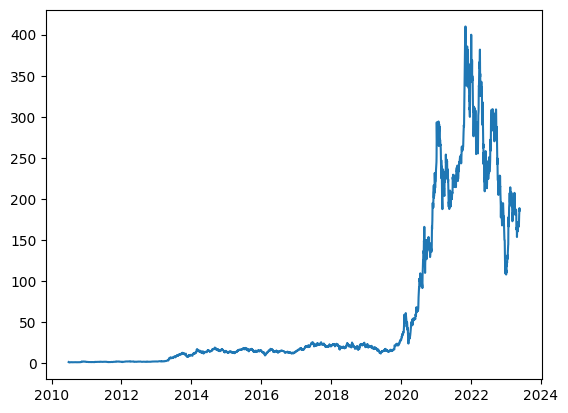

In [ ]:
#simple vizualisation
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])

In [ ]:
#formats data in LTSM friendly format and cuts most of data out for performance reasons

import numpy as np

def data_to_windowed_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_time(first_date_str)
  last_date  = string_to_time(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    data_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = data_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_data = pd.DataFrame({})
  ret_data['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_data[f'Target-{n-i}'] = X[:, i]
  
  ret_data['Target'] = Y

  return ret_data

windowed_data = data_to_windowed_data(data, 
                                '2018-06-07', 
                                '2023-01-27', 
                                n=7)
windowed_data

,Target Date,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2018-06-07,18.917334,19.448000,18.982000,19.454666,19.782667,19.408667,21.299999,21.072666
1,2018-06-08,19.448000,18.982000,19.454666,19.782667,19.408667,21.299999,21.072666,21.177334
2,2018-06-11,18.982000,19.454666,19.782667,19.408667,21.299999,21.072666,21.177334,22.139999
3,2018-06-12,19.454666,19.782667,19.408667,21.299999,21.072666,21.177334,22.139999,22.851334
4,2018-06-13,19.782667,19.408667,21.299999,21.072666,21.177334,22.139999,22.851334,22.985332
...,...,...,...,...,...,...,...,...,...
1164,2023-01-23,123.220001,123.559998,122.400002,131.490005,128.779999,127.169998,133.419998,143.750000
1165,2023-01-24,123.559998,122.400002,131.490005,128.779999,127.169998,133.419998,143.750000,143.889999
1166,2023-01-25,122.400002,131.490005,128.779999,127.169998,133.419998,143.750000,143.889999,144.429993
1167,2023-01-26,131.490005,128.779999,127.169998,133.419998,143.750000,143.889999,144.429993,160.270004


In [ ]:
#formats data, so its usable with tensorflow
def windowed_data_to_date_X_y(windowed_dataframe):
  data_as_np = windowed_dataframe.to_numpy()

  dates = data_as_np[:, 0]

  middle_matrix = data_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = data_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape

((1169,), (1169, 7, 1), (1169,))

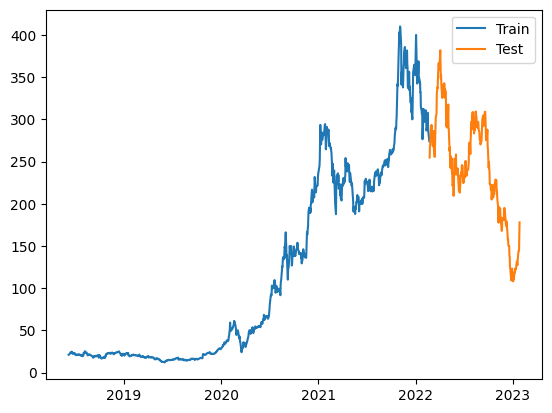

In [ ]:
#partitions data to Train, Validation and Test parts
part_80 = int(len(dates) * .8)
part_90 = int(len(dates) * .8)

dates_train, X_train, y_train = dates[:part_80], X[:part_80], y[:part_80]

dates_test, X_test, y_test = dates[part_90:], X[part_90:], y[part_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


#fitting the model
model = Sequential([layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

#amount of epoches is manually optimized
model.fit(X_train, y_train, epochs=43)

Epoch 1/43
30/30 [==============================] - 4s 7ms/step - loss: 26214.8809 - mean_absolute_error: 115.4005
Epoch 2/43
30/30 [==============================] - 0s 7ms/step - loss: 25128.2148 - mean_absolute_error: 109.1440
Epoch 3/43
30/30 [==============================] - 0s 7ms/step - loss: 21132.3750 - mean_absolute_error: 97.9410
Epoch 4/43
30/30 [==============================] - 0s 7ms/step - loss: 14177.6426 - mean_absolute_error: 86.9911
Epoch 5/43
30/30 [==============================] - 0s 7ms/step - loss: 6353.9463 - mean_absolute_error: 46.1304
Epoch 6/43
30/30 [==============================] - 0s 7ms/step - loss: 1888.5540 - mean_absolute_error: 20.0532
Epoch 7/43
30/30 [==============================] - 0s 7ms/step - loss: 615.1216 - mean_absolute_error: 10.6018
Epoch 8/43
30/30 [==============================] - 0s 7ms/step - loss: 278.1658 - mean_absolute_error: 7.1935
Epoch 9/43
30/30 [==============================] - 0s 7ms/step - loss: 187.2977 - mean_absol

In [ ]:
dates_train

array([Timestamp('2018-06-07 00:00:00'), Timestamp('2018-06-08 00:00:00'),
       Timestamp('2018-06-11 00:00:00'), Timestamp('2018-06-12 00:00:00'),
       Timestamp('2018-06-13 00:00:00'), Timestamp('2018-06-14 00:00:00'),
       Timestamp('2018-06-15 00:00:00'), Timestamp('2018-06-18 00:00:00'),
       Timestamp('2018-06-19 00:00:00'), Timestamp('2018-06-20 00:00:00'),
       Timestamp('2018-06-21 00:00:00'), Timestamp('2018-06-22 00:00:00'),
       Timestamp('2018-06-25 00:00:00'), Timestamp('2018-06-26 00:00:00'),
       Timestamp('2018-06-27 00:00:00'), Timestamp('2018-06-28 00:00:00'),
       Timestamp('2018-06-29 00:00:00'), Timestamp('2018-07-02 00:00:00'),
       Timestamp('2018-07-03 00:00:00'), Timestamp('2018-07-05 00:00:00'),
       Timestamp('2018-07-06 00:00:00'), Timestamp('2018-07-09 00:00:00'),
       Timestamp('2018-07-10 00:00:00'), Timestamp('2018-07-11 00:00:00'),
       Timestamp('2018-07-12 00:00:00'), Timestamp('2018-07-13 00:00:00'),
       Timestamp('2018-07

In [ ]:
import pandas as pd

# Define the start and end dates of the interval
start_date = '2023-01-27'
end_date = '2023-03-15'

# Create a custom array of timestamps for a hundred days within the interval
timestamps = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m-%d %H:%M:%S')

timestamps = np.array(timestamps)

# Print the custom array of timestamps
print(timestamps)

['2023-01-27 00:00:00' '2023-01-28 00:00:00' '2023-01-29 00:00:00'
 '2023-01-30 00:00:00' '2023-01-31 00:00:00' '2023-02-01 00:00:00'
 '2023-02-02 00:00:00' '2023-02-03 00:00:00' '2023-02-04 00:00:00'
 '2023-02-05 00:00:00' '2023-02-06 00:00:00' '2023-02-07 00:00:00'
 '2023-02-08 00:00:00' '2023-02-09 00:00:00' '2023-02-10 00:00:00'
 '2023-02-11 00:00:00' '2023-02-12 00:00:00' '2023-02-13 00:00:00'
 '2023-02-14 00:00:00' '2023-02-15 00:00:00' '2023-02-16 00:00:00'
 '2023-02-17 00:00:00' '2023-02-18 00:00:00' '2023-02-19 00:00:00'
 '2023-02-20 00:00:00' '2023-02-21 00:00:00' '2023-02-22 00:00:00'
 '2023-02-23 00:00:00' '2023-02-24 00:00:00' '2023-02-25 00:00:00'
 '2023-02-26 00:00:00' '2023-02-27 00:00:00' '2023-02-28 00:00:00'
 '2023-03-01 00:00:00' '2023-03-02 00:00:00' '2023-03-03 00:00:00'
 '2023-03-04 00:00:00' '2023-03-05 00:00:00' '2023-03-06 00:00:00'
 '2023-03-07 00:00:00' '2023-03-08 00:00:00' '2023-03-09 00:00:00'
 '2023-03-10 00:00:00' '2023-03-11 00:00:00' '2023-03-12 00:00

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = timestamps

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 23ms/step


ConversionError: ignored

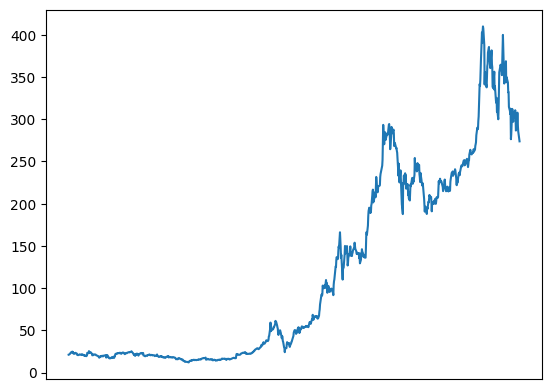

In [ ]:
import matplotlib.dates as mdates
x_values = mdates.date2num(timestamps)
plt.plot(dates_train, y_train)
plt.plot(recursive_dates, recursive_predictions)

In [ ]:
X_future = X_future.reshape(-1,7,1)
X_future.shape

(945, 7, 1)

30/30 [==============================] - 0s 3ms/step


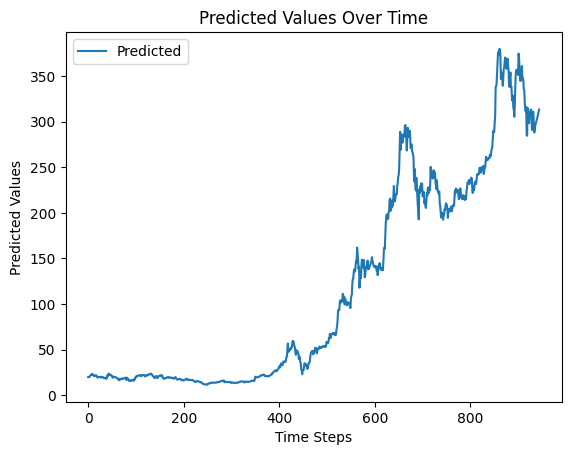

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the X_future dataset with shape (num_samples, sequence_length, num_features)

# Generate predictions for future time steps
predictions = model.predict(X_future)

# Flatten the predictions to get a 1-dimensional array
predicted_values = predictions.flatten()

# Create an array of time steps for the x-axis
time_steps = np.arange(len(predicted_values))

# Plot the predicted values
plt.plot(time_steps, predicted_values, label='Predicted')

# Add labels and title to the plot
plt.xlabel('Time Steps')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Over Time')

# Show a legend
plt.legend()

# Display the plot
plt.show()

30/30 [==============================] - 0s 3ms/step


ValueError: ignored

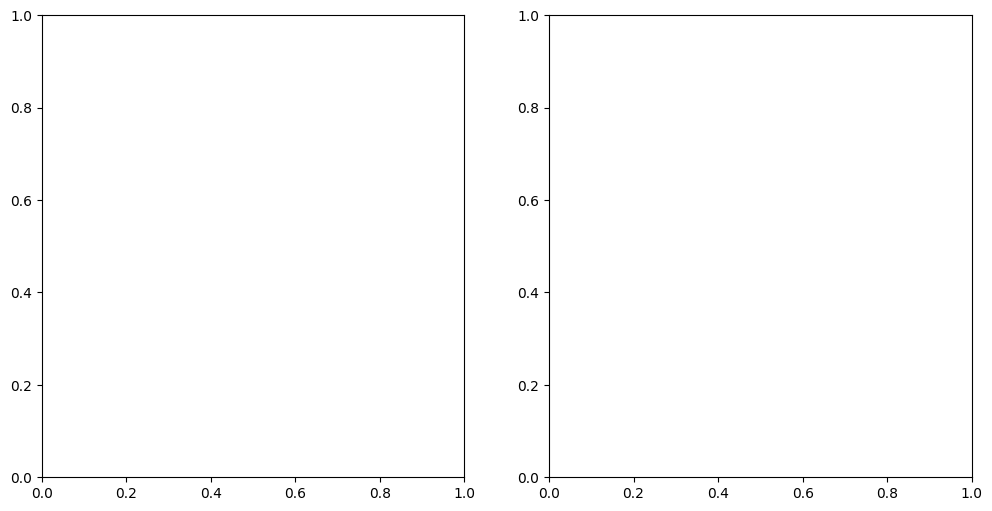

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the X_future dataset with shape (num_samples, sequence_length, num_features)
# Assuming you have the X_train dataset for comparison with shape (num_samples, sequence_length, num_features)

# Generate predictions for future time steps
predictions = model.predict(X_future)

# Flatten the predictions and X_train data to get 1-dimensional arrays
predicted_values = predictions.flatten()
original_values = X_train.flatten()

# Create an array of time steps for the x-axis
time_steps = np.arange(len(predicted_values))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data on the left subplot
ax1.plot(time_steps, original_values, label='Original', color='blue')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Values')
ax1.set_title('Original Data')

# Plot the predicted values on the right subplot
ax2.plot(time_steps, predicted_values, label='Predicted', color='red')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Values')
ax2.set_title('Predicted Values')

# Show a legend for both subplots
ax1.legend()
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

30/30 [==============================] - 1s 2ms/step


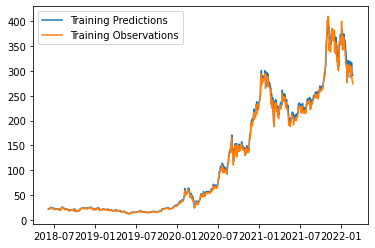

In [ ]:
#check for Train prediction precision
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

8/8 [==============================] - 0s 3ms/step


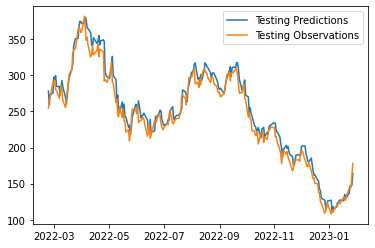

In [ ]:
#check for Test prediction precision
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

# ***`Test the model with Meta dataset`***

In [ ]:
#reads dataset
import pandas as pd

data = pd.read_csv('META.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2720,2023-03-13,177.960007,183.779999,174.820007,180.899994,180.899994,24728000
2721,2023-03-14,187.580002,194.320007,186.559998,194.020004,194.020004,41642600
2722,2023-03-15,192.949997,197.779999,190.839996,197.750000,197.750000,42123600
2723,2023-03-16,198.259995,205.759995,196.089996,204.929993,204.929993,50447100


In [ ]:
#useless data is discarded
data = data[['Date' , 'Close']]

data

,Date,Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999
...,...,...
2720,2023-03-13,180.899994
2721,2023-03-14,194.020004
2722,2023-03-15,197.750000
2723,2023-03-16,204.929993


In [ ]:
#datetime is formatted from string to actual datetime
import datetime 

def string_to_time(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = string_to_time('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [ ]:
data['Date'] = data['Date'].apply(string_to_time)
data['Date']

<ipython-input-41-3cbaaaadd3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(string_to_time)


0      2012-05-18
1      2012-05-21
2      2012-05-22
3      2012-05-23
4      2012-05-24
          ...    
2720   2023-03-13
2721   2023-03-14
2722   2023-03-15
2723   2023-03-16
2724   2023-03-17
Name: Date, Length: 2725, dtype: datetime64[ns]

In [ ]:
#set date as index
data.index = data.pop('Date')
data

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999
...,...
2023-03-13,180.899994
2023-03-14,194.020004
2023-03-15,197.750000


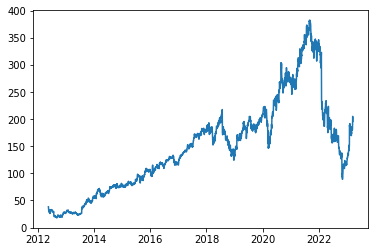

In [ ]:
#plotting the values
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])

In [ ]:
#formats data in LTSM friendly format and cuts most of data out for performance reasons

import numpy as np

def data_to_windowed_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_time(first_date_str)
  last_date  = string_to_time(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    data_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = data_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_data = pd.DataFrame({})
  ret_data['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_data[f'Target-{n-i}'] = X[:, i]
  
  ret_data['Target'] = Y

  return ret_data

windowed_data = data_to_windowed_data(data, 
                                '2018-01-01', 
                                '2023-01-27', 
                                n=3)
windowed_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-01-01,175.990005,177.619995,177.919998,176.460007
1,2018-01-03,177.919998,176.460007,181.419998,184.669998
2,2018-01-04,176.460007,181.419998,184.669998,184.330002
3,2018-01-05,181.419998,184.669998,184.330002,186.850006
4,2018-01-08,184.669998,184.330002,186.850006,188.279999
...,...,...,...,...,...
1272,2023-01-23,133.020004,136.149994,139.369995,143.270004
1273,2023-01-24,136.149994,139.369995,143.270004,143.139999
1274,2023-01-25,139.369995,143.270004,143.139999,141.500000
1275,2023-01-26,143.270004,143.139999,141.500000,147.300003


In [ ]:
#formats data, so its usable with tensorflow
def windowed_data_to_date_X_y(windowed_dataframe):
  data_as_np = windowed_dataframe.to_numpy()

  dates = data_as_np[:, 0]

  middle_matrix = data_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = data_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape

((1277,), (1277, 3, 1), (1277,))

40/40 [==============================] - 0s 2ms/step


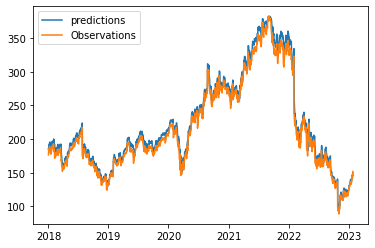

In [ ]:
#check for Train prediction precision
train_predictions = model.predict(X).flatten()

plt.plot(dates, train_predictions)
plt.plot(dates, y)
plt.legend(['predictions', 'Observations'])

# ***`Test with Nasdaq`***

In [ ]:
#reads dataset
import pandas as pd

data = pd.read_csv('^IXIC.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...,...
13138,2023-03-13,11041.459961,11326.730469,10982.799805,11188.839844,11188.839844,6201490000
13139,2023-03-14,11357.730469,11467.019531,11284.929688,11428.150391,11428.150391,5533120000
13140,2023-03-15,11291.169922,11447.900391,11238.440430,11434.049805,11434.049805,5912430000
13141,2023-03-16,11384.870117,11733.799805,11365.490234,11717.280273,11717.280273,5498920000


In [ ]:
#useless data is discarded
data = data[['Date' , 'Close']]

data

,Date,Close
0,1971-02-05,100.000000
1,1971-02-08,100.839996
2,1971-02-09,100.760002
3,1971-02-10,100.690002
4,1971-02-11,101.449997
...,...,...
13138,2023-03-13,11188.839844
13139,2023-03-14,11428.150391
13140,2023-03-15,11434.049805
13141,2023-03-16,11717.280273


In [ ]:
#datetime is formatted from string to actual datetime
import datetime 

def string_to_time(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = string_to_time('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [ ]:
data['Date'] = data['Date'].apply(string_to_time)
data['Date']

<ipython-input-52-3cbaaaadd3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(string_to_time)


0       1971-02-05
1       1971-02-08
2       1971-02-09
3       1971-02-10
4       1971-02-11
           ...    
13138   2023-03-13
13139   2023-03-14
13140   2023-03-15
13141   2023-03-16
13142   2023-03-17
Name: Date, Length: 13143, dtype: datetime64[ns]

In [ ]:
#set datetime as index
data.index = data.pop('Date')
data

,Close
Date,
1971-02-05,100.000000
1971-02-08,100.839996
1971-02-09,100.760002
1971-02-10,100.690002
1971-02-11,101.449997
...,...
2023-03-13,11188.839844
2023-03-14,11428.150391
2023-03-15,11434.049805


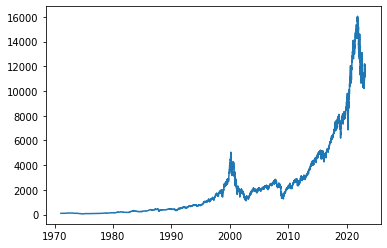

In [ ]:
#plot the data
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])

In [ ]:
#formats data in LTSM friendly format and cuts most of data out for performance reasons

import numpy as np

def data_to_windowed_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_time(first_date_str)
  last_date  = string_to_time(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    data_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = data_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_data = pd.DataFrame({})
  ret_data['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_data[f'Target-{n-i}'] = X[:, i]
  
  ret_data['Target'] = Y

  return ret_data

windowed_data = data_to_windowed_data(data, 
                                '2021-06-07', 
                                '2023-01-27', 
                                n=3)
windowed_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-06-07,13756.330078,13614.509766,13814.490234,13881.719727
1,2021-06-08,13614.509766,13814.490234,13881.719727,13924.910156
2,2021-06-09,13814.490234,13881.719727,13924.910156,13911.750000
3,2021-06-10,13881.719727,13924.910156,13911.750000,14020.330078
4,2021-06-11,13924.910156,13911.750000,14020.330078,14069.419922
...,...,...,...,...,...
410,2023-01-23,10957.009766,10852.269531,11140.429688,11364.410156
411,2023-01-24,10852.269531,11140.429688,11364.410156,11334.269531
412,2023-01-25,11140.429688,11364.410156,11334.269531,11313.360352
413,2023-01-26,11364.410156,11334.269531,11313.360352,11512.410156


In [ ]:
#formats data, so its usable with tensorflow
def windowed_data_to_date_X_y(windowed_dataframe):
  data_as_np = windowed_dataframe.to_numpy()

  dates = data_as_np[:, 0]

  middle_matrix = data_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = data_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape

((415,), (415, 3, 1), (415,))

13/13 [==============================] - 0s 3ms/step


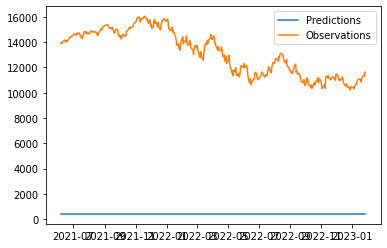

In [ ]:
#prediction of the model (absolute fail)
t = model.predict(X).flatten()

plt.plot(dates, t)
plt.plot(dates, y)
plt.legend(['Predictions', 'Observations'])

# ***`Test with Microsoft`***

In [ ]:
#reads dataset
import pandas as pd

data = pd.read_csv('MSFT.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...,...
9324,2023-03-13,247.399994,257.910004,245.729996,253.919998,253.919998,33339700
9325,2023-03-14,256.750000,261.070007,255.860001,260.790009,260.790009,33620300
9326,2023-03-15,259.980011,266.480011,259.209991,265.440002,265.440002,46028000
9327,2023-03-16,265.209991,276.559998,263.279999,276.200012,276.200012,54768800


In [ ]:
#useless data is discarded
data = data[['Date' , 'Close']]

data

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9324,2023-03-13,253.919998
9325,2023-03-14,260.790009
9326,2023-03-15,265.440002
9327,2023-03-16,276.200012


In [ ]:
#datetime is formatted from string to actual datetime
import datetime 

def string_to_time(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = string_to_time('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [ ]:
data['Date'] = data['Date'].apply(string_to_time)
data['Date']

<ipython-input-61-3cbaaaadd3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(string_to_time)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9324   2023-03-13
9325   2023-03-14
9326   2023-03-15
9327   2023-03-16
9328   2023-03-17
Name: Date, Length: 9329, dtype: datetime64[ns]

In [ ]:
#sets the date as the index
data.index = data.pop('Date')
data

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-03-13,253.919998
2023-03-14,260.790009
2023-03-15,265.440002


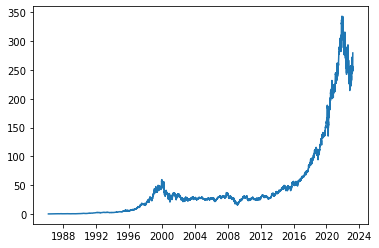

In [ ]:
#plot the data
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])

In [ ]:
#formats data in LTSM friendly format and cuts most of data out for performance reasons

import numpy as np

def data_to_windowed_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_time(first_date_str)
  last_date  = string_to_time(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    data_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = data_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_data = pd.DataFrame({})
  ret_data['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_data[f'Target-{n-i}'] = X[:, i]
  
  ret_data['Target'] = Y

  return ret_data

windowed_data = data_to_windowed_data(data, 
                                '2018-06-07', 
                                '2023-01-27', 
                                n=3)
windowed_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-06-07,101.669998,102.190002,102.489998,100.879997
1,2018-06-08,102.190002,102.489998,100.879997,101.629997
2,2018-06-11,102.489998,100.879997,101.629997,101.050003
3,2018-06-12,100.879997,101.629997,101.050003,101.309998
4,2018-06-13,101.629997,101.050003,101.309998,100.849998
...,...,...,...,...,...
1164,2023-01-23,235.809998,231.929993,240.220001,242.580002
1165,2023-01-24,231.929993,240.220001,242.580002,242.039993
1166,2023-01-25,240.220001,242.580002,242.039993,240.610001
1167,2023-01-26,242.580002,242.039993,240.610001,248.000000


In [ ]:
#formats data, so its usable with tensorflow
def windowed_data_to_date_X_y(windowed_dataframe):
  data_as_np = windowed_dataframe.to_numpy()

  dates = data_as_np[:, 0]

  middle_matrix = data_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = data_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape

((1169,), (1169, 3, 1), (1169,))

37/37 [==============================] - 0s 3ms/step


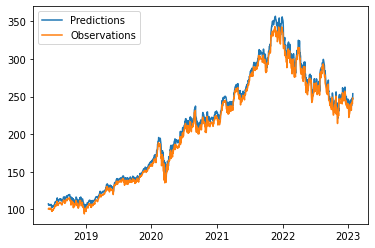

In [ ]:
#check for Test prediction precision
test_predictions = model.predict(X).flatten()

plt.plot(dates, test_predictions)
plt.plot(dates, y)
plt.legend(['Predictions', 'Observations'])

# ***`Increased data through dummy values`***

In [ ]:
#reads dataset with null values
import pandas as pd

data = pd.read_csv('MSFT 2.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1.031789e+09
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,3.081600e+08
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,1.331712e+08
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,6.776640e+07
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,4.789440e+07
...,...,...,...,...,...,...,...
9429,2023-06-26,NaN,NaN,NaN,NaN,NaN,NaN
9430,2023-06-27,NaN,NaN,NaN,NaN,NaN,NaN
9431,2023-06-28,NaN,NaN,NaN,NaN,NaN,NaN
9432,2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#useless data is discarded
data = data[['Date' , 'Close']]

data

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9429,2023-06-26,NaN
9430,2023-06-27,NaN
9431,2023-06-28,NaN
9432,2023-06-29,NaN


In [ ]:
#datetime is formatted from string to actual datetime
import datetime 

def string_to_time(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = string_to_time('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [ ]:
data['Date'] = data['Date'].apply(string_to_time)
data['Date']

<ipython-input-70-3cbaaaadd3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(string_to_time)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9429   2023-06-26
9430   2023-06-27
9431   2023-06-28
9432   2023-06-29
9433   2023-06-30
Name: Date, Length: 9434, dtype: datetime64[ns]

In [ ]:
#sets datetime as index
data.index = data.pop('Date')
data 

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-06-26,NaN
2023-06-27,NaN
2023-06-28,NaN


In [ ]:
#inserts dummy values for the null values
import numpy
data = data.fillna(100)
data

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-06-26,100.000000
2023-06-27,100.000000
2023-06-28,100.000000


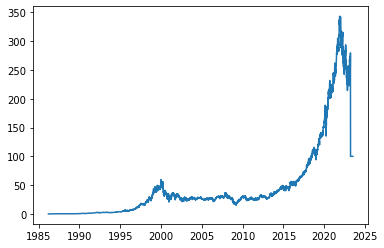

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])

In [ ]:
#formats data in LTSM friendly format and cuts most of data out for performance reasons

import numpy as np

def data_to_windowed_data(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_time(first_date_str)
  last_date  = string_to_time(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    data_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(data_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = data_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_data = pd.DataFrame({})
  ret_data['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_data[f'Target-{n-i}'] = X[:, i]
  
  ret_data['Target'] = Y

  return ret_data

windowed_data = data_to_windowed_data(data, 
                                '2023-01-27', 
                                '2023-06-30', 
                                n=3)
windowed_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-27,242.039993,240.610001,248.000000,248.160004
1,2023-01-30,240.610001,248.000000,248.160004,242.710007
2,2023-01-31,248.000000,248.160004,242.710007,247.809998
3,2023-02-01,248.160004,242.710007,247.809998,252.750000
4,2023-02-02,242.710007,247.809998,252.750000,264.600006
...,...,...,...,...,...
135,2023-06-26,100.000000,100.000000,100.000000,100.000000
136,2023-06-27,100.000000,100.000000,100.000000,100.000000
137,2023-06-28,100.000000,100.000000,100.000000,100.000000
138,2023-06-29,100.000000,100.000000,100.000000,100.000000


In [ ]:
#formats data, so its usable with tensorflow
def windowed_data_to_date_X_y(windowed_dataframe):
  data_as_np = windowed_dataframe.to_numpy()

  dates = data_as_np[:, 0]

  middle_matrix = data_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = data_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_data)

dates.shape, X.shape, y.shape

((140,), (140, 3, 1), (140,))

5/5 [==============================] - 0s 4ms/step


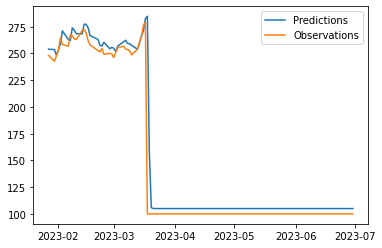

In [ ]:
#check for Test prediction precision (more of a fail)
test_predictions = model.predict(X).flatten()

plt.plot(dates, test_predictions)
plt.plot(dates, y)
plt.legend(['Predictions', 'Observations'])